다중회귀 : 여러개의 특성을 사용한 선형회귀

판다스로 데이터 준비

농어의 길이, 높이, 무게

In [ ]:
import pandas as pd
df = pd.read_csv("/content/perch_full.csv") #판다스로 데이터 부르고
perch_full = df.to_numpy() #넘파이 배열로 바꾼다
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타켓테이터 준비완료!

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

다항특성만들기

특성공학: 특성을 서로 곱해서 다른 특성을 만듬
기존의 특성을 사용하여 새로운 특성을 만듬

변환기: polynomialFeatures->fit, transform

추정기: 모델링 하는거, 선형회귀, k이웃->fit, score, predict

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# degree = 2
poly = PolynomialFeatures()
poly.fit([[2,3]])
#1(bias), 2, 3, 2**2, 2*3, 3**2 
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


사이킷런에서 제공해주는 train_test_split함수로부터 훈련세트, 테스트세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)

LinearRegression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False) #절편데이터=1 제거
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


42개 샘플, 9개의 특성

In [ ]:
poly.get_feature_names()
#특성은 다음과 같다! 기본 degree=2

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

높이, 두께를 모두 사용 + 각 특성을 제곱, 서로곱하기를 했더니 선형회귀능력 매우 우수

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#특성이 9개자냐~

0.9903183436982124


underfitting도 발생 X

In [ ]:
print(lr.score(test_poly,test_target))

0.9714559911594132


더 많은 특성을 만들기 5제곱!

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
#특성이 55개

(42, 55)


In [ ]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9999999999991096


In [ ]:
print(lr.score(test_poly,test_target))#??

-144.40579242335605


특성의 개수가 많아지면 선형모델은 강력해진다

훈련세트에 과대적합이 되어 테스트세트는 이상해짐

샘플이 42개 특성이 55개 ㅋㅋㅋㅋ
맞혀야 할 대상보다 사용할 도구가 더 많닼ㅋㅋ


규제(정규화)가 필요 ->가중치(기울기)를 작게만든다(Ridge, Rasso)

규제: 머신러닝모델이 훈련세트를 너무 과도하게 학습하지 못하도록 규제를 가하는 것

선형회귀모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.


규제(Regularization)

In [ ]:
from sklearn.preprocessing import StandardScaler #규제하기전에 표준화
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)#표준점수로 반환
test_scaled=ss.transform(test_poly)#표준점수로 반환

릿지(Ridge) 회귀 : 가중치^2, L2규제 ->모델파라미터

alpha = 1 <기본적으로> ->하이퍼파라미터

alpha가 클수록 강도가 강해짐

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)#훈련
print(ridge.score(train_scaled, train_target))#평가

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615398


적절한 규제 강도 찾기 (alpha값 찾기)

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [ ]:
alpha_list=[0.001, 0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

파란색: 훈련세트 

노란색: 테스트세트

-> alpha의 상용로그값이 -1 즉, 알파값이 0.1일때가 가장 이상적임

alpha값이 작아질수록 overfitting, 클수록 underfitting

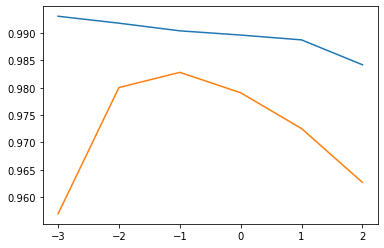

In [ ]:
plt.plot(np.log10(alpha_list), train_score)#상용로그<간격을 맞추기 위해-3,-2,-1,0,1,2>
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1) #규제하는 알파값은 0.1일때 베리 굿
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


라쏘(Lasso)회귀: 가중치의 절대값, L1규제

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))

0.9897898972080961


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score=[]
test_score=[]
alpha_list=[0.001, 0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


In [ ]:
print(train_score)
print(test_score)#그래프 ㄱㄱ

[0.9924957354689654, 0.9922988130765112, 0.9902080238600285, 0.9898116789062786, 0.9887624603020235, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


alpha 파라미터값은 10이 적절하다

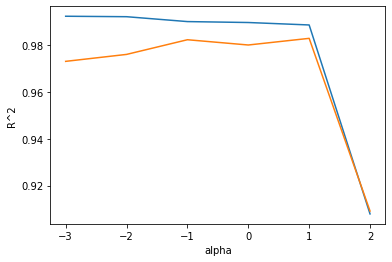

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


일반적으로는 Lasso보다는 Ridge 회귀를 더 선호한다

가중치를 0으로 만들어서 특성을 0으로 만들어 특성을 사용안하게 된다

In [ ]:
print(np.sum(lasso.coef_ == 0))

40


총 55개. 15개만 특성을 사용. 40개의 특성 사용X